In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
data = sp.genfromtxt("/Users/Marku/Google Drive/DATA/Python/BuildingMachineLearningSystemsWithPython-second_edition/ch01/data/web_traffic.tsv", delimiter="\t")

In [15]:
print(data[:10])
print('------------')
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
------------
(743, 2)


In [17]:
x = data[:,0]
y = data[:,1]

In [21]:
print(x)
print('-----------')
print(y)

[   1.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   24.   25.   26.
   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.
   39.   40.   41.   42.   43.   44.   45.   46.   47.   49.   50.   51.
   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.
   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.   75.
   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.
   88.   89.   90.   91.   92.   93.   94.   96.   97.   98.   99.  100.
  101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.
  113.  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.
  125.  126.  127.  128.  129.  130.  131.  132.  133.  134.  135.  136.
  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.  147.  148.
  149.  150.  151.  152.  153.  155.  156.  157.  158.  159.  160.  161.
  162.  163.  164.  165.  166.  167.  168.  169.  1

In [19]:
sp.sum(sp.isnan(y))

8

In [20]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

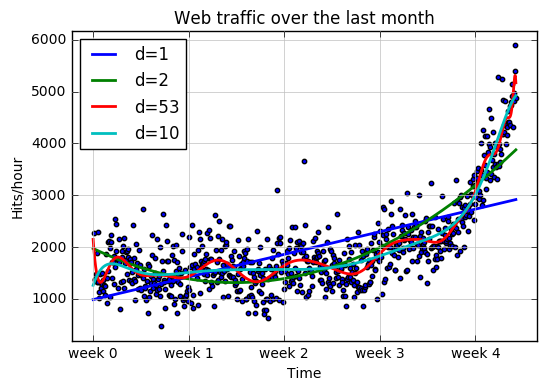

In [88]:
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks( [w*7*24 for w in range(10) ] , [ 'week %i' % w for w in range(10) ] )
plt.autoscale( tight = True )

# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

# fitting new lines 
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=2)


#grau 2
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f2(fx), linewidth=2)

#grau 53
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f3(fx), linewidth=2)

#grau 10
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f4(fx), linewidth=2)
plt.legend(["d=%i" % f1.order,"d=%i" % f2.order,"d=%i" % f3.order,"d=%i" % f4.order], loc="upper left")





#exibe o gráfico
plt.show()

In [40]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [44]:
sp.polyfit?

Testando polinomio de grau 1

In [31]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [33]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [34]:
f1 = sp.poly1d(fp1)

In [35]:
print(error(f1, x, y))

317389767.34


Testando polinomio grau 2

In [45]:
f2p = sp.polyfit(x, y, 2)

In [51]:
print(f2p)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [48]:
sp.poly1d?

In [49]:
f2 = sp.poly1d(f2p)

In [50]:
print(error(f2, x, y))

179983507.878


In [81]:
print(error(f1,x,y))
print(error(f2,x,y))
print(error(f3,x,y))

317389767.34
179983507.878
121942326.364


In [86]:
f3p = sp.polyfit(x,y,53)
f3 = sp.poly1d(f3p)

/Users/Marku/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [87]:
f4p = sp.polyfit(x,y,10)
f4 = sp.poly1d(f4p)